In [9]:
import yfinance as yf

stock_symbol = 'TCS.NS'  # TCS on NSE
start_date = '2022-08-10'
end_date = '2024-08-10'

data = yf.download(stock_symbol, start=start_date, end=end_date)
data.to_csv('TCS_data.csv') 


[*********************100%%**********************]  1 of 1 completed


In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('TCS_data.csv', index_col='Date', parse_dates=True)

data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()


data['Signal'] = 0
data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SMA50'][20:], 1, 0)  # Buy signal
data['Position'] = data['Signal'].diff()  # Position change

data = data.dropna()


In [31]:
initial_capital = 100000
data['Position'] = data['Signal'].diff()  # Position changes
data['Daily_Return'] = data['Close'].pct_change()

data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1)

data['Portfolio_Value'] = initial_capital * (1 + data['Strategy_Return']).cumprod()
data['Cumulative_Market_Value'] = initial_capital * (1 + data['Daily_Return']).cumprod()


total_returns = data['Portfolio_Value'].iloc[-1] - initial_capital
num_trades = data['Position'].dropna().count()
winning_trades = data[data['Strategy_Return'] > 0].count()['Strategy_Return']
losing_trades = data[data['Strategy_Return'] < 0].count()['Strategy_Return']
winning_trades_percent = (winning_trades / num_trades) * 100
losing_trades_percent = (losing_trades / num_trades) * 100
max_drawdown = data['Portfolio_Value'].min()

print(f"Total Returns: {total_returns:.2f}")
print(f"Number of Trades: {num_trades:.0f}")
print(f"Winning Trades (%): {winning_trades_percent:.2f}")
print(f"Losing Trades (%): {losing_trades_percent:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2f}")


Total Returns: 8332.21
Number of Trades: 442
Winning Trades (%): 31.22
Losing Trades (%): 33.26
Maximum Drawdown: 91735.75


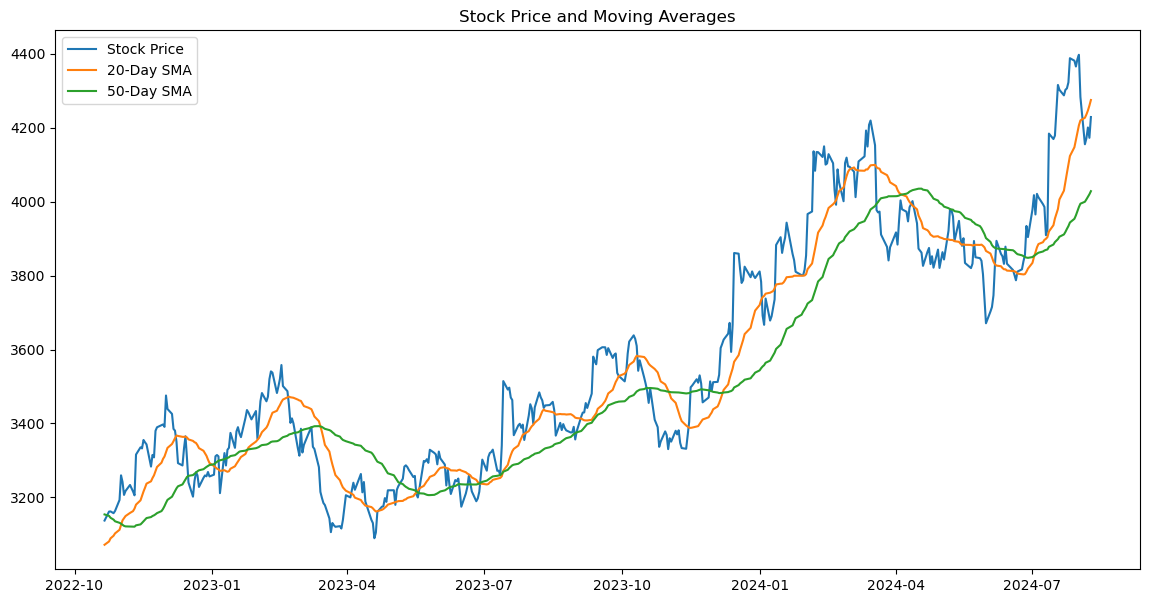

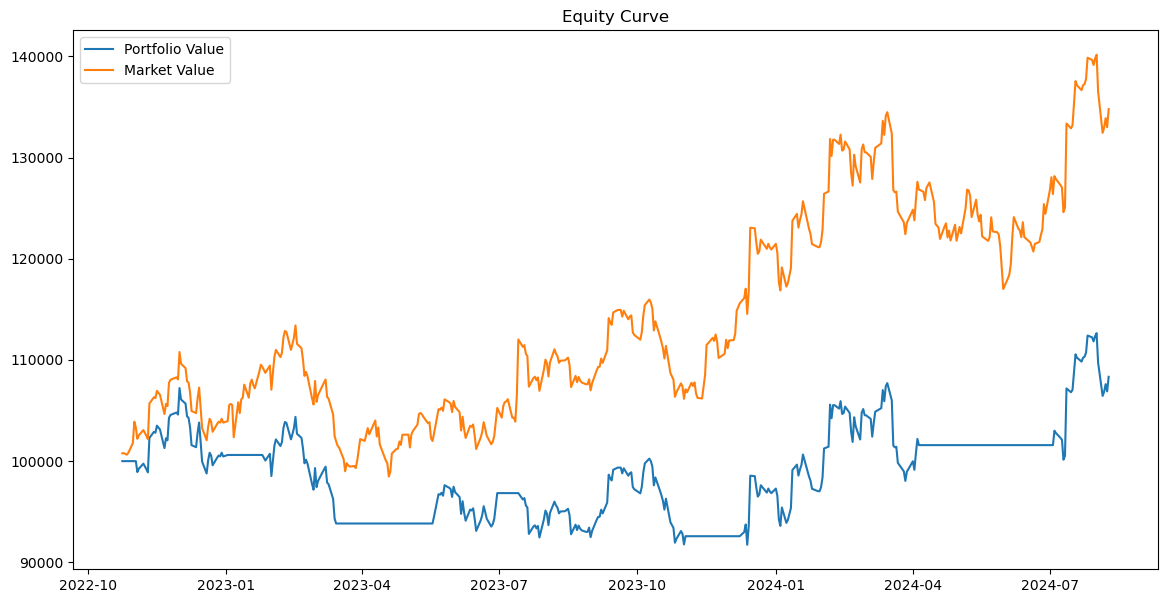

In [23]:
import matplotlib.pyplot as plt

#stock price and SMAs
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Stock Price')
plt.plot(data['SMA20'], label='20-Day SMA')
plt.plot(data['SMA50'], label='50-Day SMA')
plt.title('Stock Price and Moving Averages')
plt.legend()
plt.show()

#equity curve
plt.figure(figsize=(14, 7))
plt.plot(data['Portfolio_Value'], label='Portfolio Value')
plt.plot(data['Cumulative_Market_Value'], label='Market Value')
plt.title('Equity Curve')
plt.legend()
plt.show()


In [45]:
total_returns = data['Portfolio_Value'].iloc[-1] - initial_capital
market_total_returns = data['Cumulative_Market_Value'].iloc[-1] - initial_capital


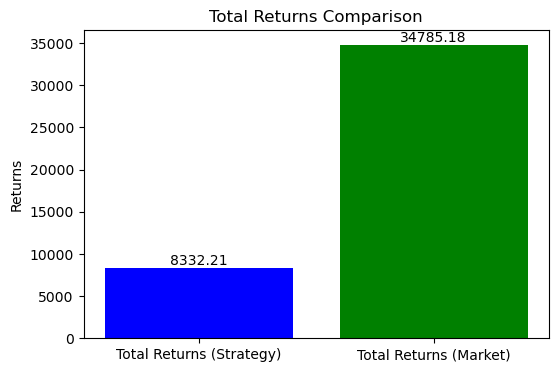

In [51]:


# Define the total returns for strategy and market
total_returns_strategy = total_returns
total_returns_market = market_total_returns

# Data for plotting
labels = ['Total Returns (Strategy)', 'Total Returns (Market)']
values = [total_returns_strategy, total_returns_market]

# Create a bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['blue', 'green'])

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.ylabel('Returns')
plt.title('Total Returns Comparison')
plt.show()
